In [2]:
#imports 
# imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# load hourly data
hourly_data = pd.read_csv("G:\\Projects\\Sharing_bike_analysis\\biking_analysis\\dataset\\hour.csv")


# Data Processing

In [3]:
hourly_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Checking the size of the data, the number of missing values for each column, and some general statistics about the numeral columns

In [4]:
#Printing generic statistics about the data

print(f"shape of the date: {hourly_data.shape}")
print(f"Number of missing values in the data: {hourly_data.isnull().sum().sum()}" )

shape of the date: (17379, 17)
Number of missing values in the data: 0


Note that the 'T' character after the 'describe()' method gets the transpose of the resulting dataset, hence the columns become rows and vice versa.

In [5]:
#get statistics on the numerical columns

hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [13]:
# Creating a copy of the orginal data
preprocessed_data = hourly_data.copy()
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [45]:
# transform seasons 
#season_mappings = {"winter": 1, "spring": 2,"summer": 3, "autumn": 4}
season_mappings = {1: "winter", 2: "spring", 3: "summer", 4: "autumn"}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: season_mappings[x])
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [43]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])


In [44]:
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,2011,1,1,0,saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,2011,1,2,0,saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,2011,1,3,0,saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,2011,1,4,0,saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,2012,12,20,0,monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,2012,12,21,0,monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,2012,12,22,0,monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [40]:
# Transform Week-day
weekday_mapping = {0 : 'sunday', 1 : 'monday', 2 : 'tuesday', 3 : 'wednesday', 4 : 'thursday', 5 : 'friday', 6 : 'saturday'}      #7 : 'sunday'}

#preprocessed_data.loc[preprocessed_data['weekday']==7]  # checking if there's a 7(sunday) - there isnt. 
# checkamountofdays = preprocessed_data.groupby('weekday')['workingday'].sum()
# checkamountofdays

preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])
preprocessed_data


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [46]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit']\
                                  .apply(lambda x: \
                                  weather_mapping[x])
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,clear,0.26,0.2727,0.56,0.1343,13,48,61


In [47]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']\
                                 *150  #150 is a conversion to mph

preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,clear,0.24,0.2879,81.0,0.000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,clear,0.22,0.2727,80.0,0.000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,clear,0.22,0.2727,80.0,0.000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,clear,0.24,0.2879,75.0,0.000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,clear,0.24,0.2879,75.0,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,clear,0.26,0.2576,60.0,24.630,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,clear,0.26,0.2727,56.0,20.145,13,48,61


In [52]:
# visualise preprocessed columns

cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10,random_state=123)


,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,saturday,clear,74.0,20.145
7823,autumn,2011,sunday,clear,43.0,69.405
15426,autumn,2012,tuesday,cloudy,77.0,13.440
15028,autumn,2012,sunday,clear,51.0,49.260
12290,spring,2012,friday,cloudy,89.0,29.100
3262,spring,2011,friday,clear,64.0,15.675
10763,spring,2012,thursday,clear,42.0,53.730
12384,spring,2012,tuesday,light_rain_snow,82.0,24.630
6051,summer,2011,wednesday,clear,52.0,42.540
948,winter,2011,saturday,clear,80.0,0.000


Note that -  I did not transform the temp and atemp columns (that is, the true and perceived temperatures, respectively). The reason for this is that they assume only positive values in the original dataset (hence, I do not know when the negative temperatures occurred). Furthermore, as their scales are different (the maximum value registered in the true temperature is 41 degrees, while the perceived one is 67), I do not want to modify their relations (that is, the hours at which the true temperature is greater than the perceived one and vice versa).

### Registered VS Casual Use Analysis 
We begin the analysis of the single features by focusing on the two main ones: the number of rides performed by registered users versus the number of rides performed by non-registered (or casual) ones. These numbers are represented in the registered and casual columns, respectively, with the cnt column representing the sum of the registered and casual rides. We can easily verify the last statement for each entry in the dataset by using the assert statement:

In [69]:
"""
assert that total number of rides is equal to the sum of registered and casual ones
A check to see if casual + registered equals to the total amount of users. If false, then the following message appears -- 'Sum of casual and registered rides not equal ' 'to total number of rides'

"""
assert(preprocessed_data['casual'] + preprocessed_data['registered'] == preprocessed_data['cnt']).all(), 'Sum of casual and registered rides not equal ' 'to total number of rides'


 Visualizing the distribution of the registered and casual rides:

G:\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rides distributions')

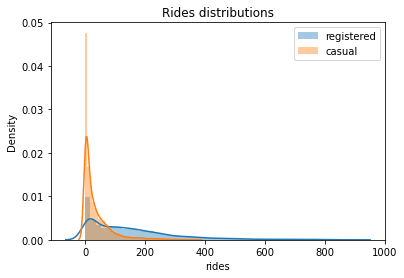

In [61]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
#plt.savefig('G:\\Projects\\Sharing_bike_analysis\\biking_analysis', format='png')

we can easily see that registered users perform way more rides than casual ones. Furthermore, we can see that the two distributions are skewed to the right, meaning that, for most of the entries in the data, zero or a small number of rides were registered (think, for example, of overnight rides). Finally, every entry in the data has quite a large number of rides (that is, higher than 800). 

Focusing on the evolution of rides overtime. We can analyse the number of rides each day by doing the following:

In [81]:
preprocessed_data.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [103]:
"""
# preprocessed_data['dteday'] = preprocessed_data['dteday'].dt.strftime('%d-%m-%Y')  -- ruins the graph
"""
# Changing format of date
preprocessed_data['dteday'] = pd.to_datetime(preprocessed_data['dteday'], format='%d-%m-%Y')
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,saturday,0,clear,0.24,0.2879,81.0,0.000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,saturday,0,clear,0.22,0.2727,80.0,0.000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,saturday,0,clear,0.22,0.2727,80.0,0.000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,saturday,0,clear,0.24,0.2879,75.0,0.000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,saturday,0,clear,0.24,0.2879,75.0,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,monday,1,cloudy,0.26,0.2576,60.0,24.630,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,monday,1,clear,0.26,0.2576,60.0,24.630,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,monday,1,clear,0.26,0.2727,56.0,20.145,13,48,61


In [104]:
test = plot_data.groupby('dteday').sum()
test

,registered,casual
dteday,,
01-01-2011,654,331
01-01-2012,1608,686
01-02-2011,1313,47
01-02-2012,4275,304
01-03-2011,1714,137
...,...,...
31-08-2012,5917,1433
31-10-2011,3307,362
31-10-2012,5147,419


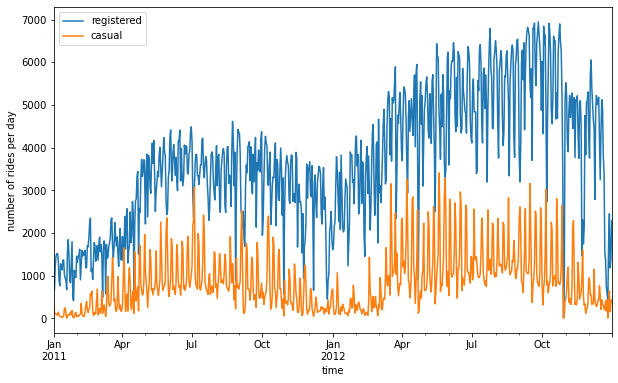

In [105]:
plot_data1 = preprocessed_data[['registered','casual', 'dteday']]
ax = plot_data1.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");